# TECHFEST 2020-21
# <font color = blue> RECOGNISIGN </font> 
### <bold> TASK </bold>
#### In this competition, the main goal is to classify traffic signs. The participants must analyze  possible techniques to classify the traffic signs (since no dataset is made available) and develop  a computer vision model that gives a reasonable accuracy during prediction.

### <bold> PROBLEM STATEMENT </bold>
#### This competition expects a Team to come with a model capable of detecting and classifying   traffic signs. Some types of signs are mentioned at the end of the Problem statement. The   Team has to build its own dataset for training the models. There is no restriction on using any   kind of data for training the model. There are no restrictions on the dataset size and contents   used for training, choice of programming languages, usage of inbuilt packages, and the type of   framework used for attempting the task  The model should be robust enough so that it is capable of performing real-time classification.

### NOTEBOOK  BY: 
#### Pushkar Jain  
#### Kirti Palve      
#### Team Id: <font color= red> RS-206619 </font>



### <font color=brown> Importing necessary libraries </font>
Language used : Python. 
Importing different libraries like keras for building the main model, sklearn for splitting the data set, PIL for converting images into array form.

In [1]:
import numpy as np                               
import pandas as pd                        
import matplotlib.pyplot as plt                  
import cv2             
import tensorflow as tf                          
from PIL import Image                           
import os                                        
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical          
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tqdm                                    
import warnings

### <font color=brown> Importing Dataset of 2257 images </font>
We are retrieving the images and converting them into the same size for recognition.

In [55]:
data = []
labels = []
classes = 6

for i in range(1,classes):
    path = os.path.join(os.getcwd(),str(i))
    images = os.listdir(path)
    
    for j in images:
        try:
            image = Image.open(path + '\\'+ j)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays bcoz its faster and takes lesser memory
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(2257, 30, 30, 3) (2257,)


### <font color=brown> Splitting the dataset into 80% train and 20% test </font>

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1805, 30, 30, 3) (452, 30, 30, 3) (1805,) (452,)


In [57]:
y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1805, 30, 30, 3) (452, 30, 30, 3) (1805, 6) (452, 6)


### <font color=brown> Model used : Sequential model from Keras library </font>
* The model will contain layers to make convolutional neural network. In the first 2 Conv2D layers we have used 32 filters and the kernel size is (5,5).
* In the MaxPool2D layer we have kept pool size (2,2). 
* In dropout layer we have kept dropout rate = 0.25 that means 25% of neurons are removed randomly.
* Then we apply flatten layer to convert 2-D data to 1-D vector. 
* This layer is followed by dense layer, dropout layer and dense layer again. This layer uses the softmax activation function which gives probability value and predicts which of the 6 options has the highest probability.

In [58]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6, activation='softmax'))

### <font color=brown> Compiling the model </font>
We will use fit function to compile the model.
We got an average validation accuracy of 87.05%

Epoch 1/2
57/57 [==============================] - 6s 100ms/step - loss: 7.0139 - accuracy: 0.5539 - val_loss: 0.6038 - val_accuracy: 0.8451
Epoch 2/2
57/57 [==============================] - 5s 84ms/step - loss: 0.6138 - accuracy: 0.8550 - val_loss: 0.3814 - val_accuracy: 0.8960


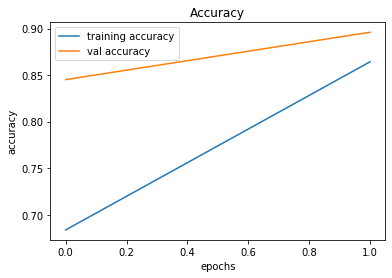

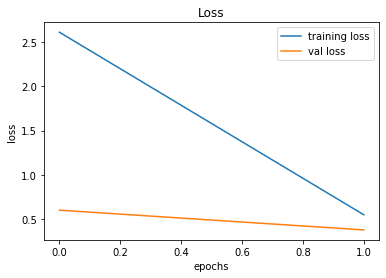

In [59]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))
model.save("Trafic_signs_model.h5")
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
#plotting graphs for loss 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### <font color=brown> Test Set </brown>
We got an accuracy of 89.14% on test set.

In [60]:

history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))
#Final training of model

warnings.filterwarnings("ignore", category=DeprecationWarning)

Epoch 1/2
57/57 [==============================] - 5s 85ms/step - loss: 0.4025 - accuracy: 0.8848 - val_loss: 0.3660 - val_accuracy: 0.8673
Epoch 2/2
57/57 [==============================] - 5s 87ms/step - loss: 0.3274 - accuracy: 0.8981 - val_loss: 0.2767 - val_accuracy: 0.9093


In [61]:
model.save("Trafic_signs_model.h5")

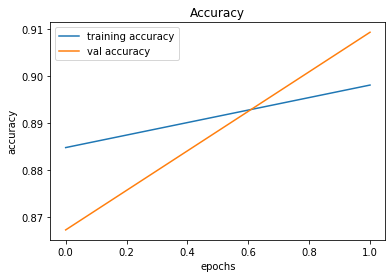

In [62]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

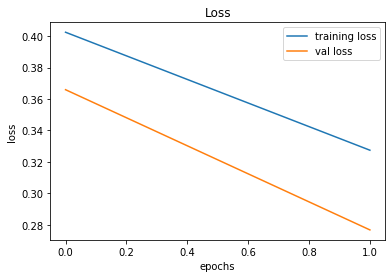

In [63]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### <font color= brown> Conclusion </font>
We implemented convolutional networks and their use in image recognition. We made a traffic sign recognizer with the use of convolutional neural networks and got an accuracy of 87.05% on validation set and 89.14% on test set.

### <font color=brown> References </font>
> https://towardsdatascience.com/traffic-sign-recognition-using-deep-neural-networks-6abdb51d8b70  
>https://github.com/kah-ve/TrafficSignGAN  
>https://towardsdatascience.com/how-to-create-your-own-image-dataset-for-deep-learning-b53f1c22c443